In [205]:
# Manipulação e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
# Manipulação de datas
from datetime import date
# Análise estatística
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
# Modelagem
import itertools

In [206]:
import  warnings 
warnings.simplefilter('ignore')

In [207]:
# Configurando tamanho das imagens
rcParams['figure.figsize'] = 15, 6

In [208]:
df = pd.read_csv("Data/MVF.csv", sep=";")
df = df.set_index('time')
df.head(2)

,target
time,
1,150
2,117


<AxesSubplot:xlabel='time'>

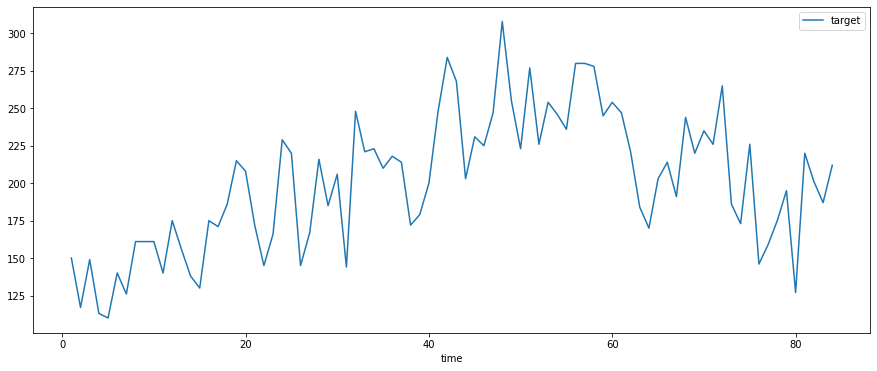

In [209]:
df.plot()

In [210]:
print(f'Valores faltantes: {df.isnull().values.any()}!')

Valores faltantes: False!


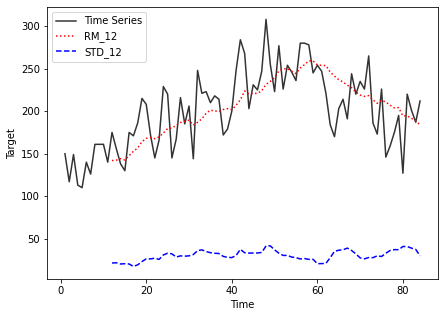

In [211]:
# A 13a observação será a média das 11 anteriores
rolmean12 = df.rolling(window = 12).mean()
rolstd12 = df.rolling(window = 12).std()
plt.figure(figsize=(7, 5))
actual = plt.plot(df['target'], color='black', label='Time Series', alpha=0.8)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

In [212]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df)
print(f'p-valor: {round(adf[1],2)}')

p-valor: 0.13


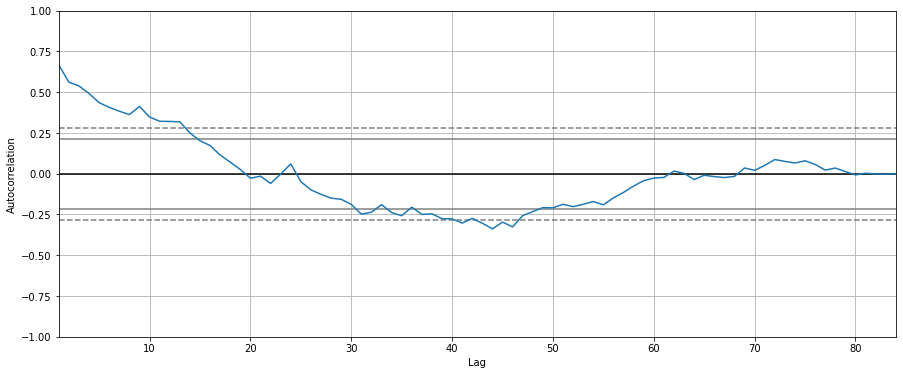

In [213]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df).plot();

In [214]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

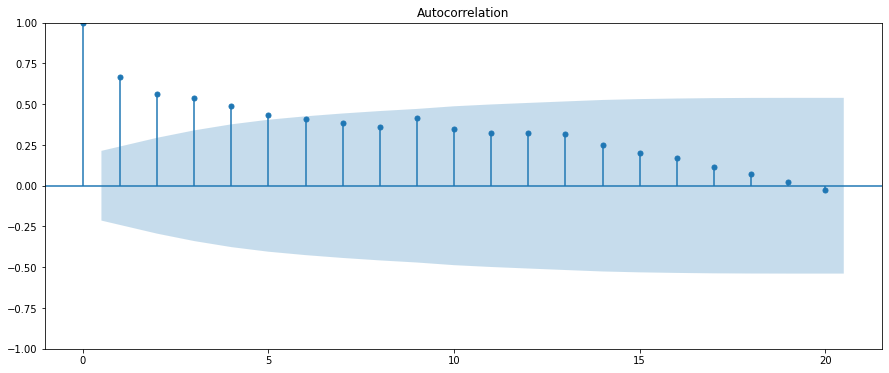

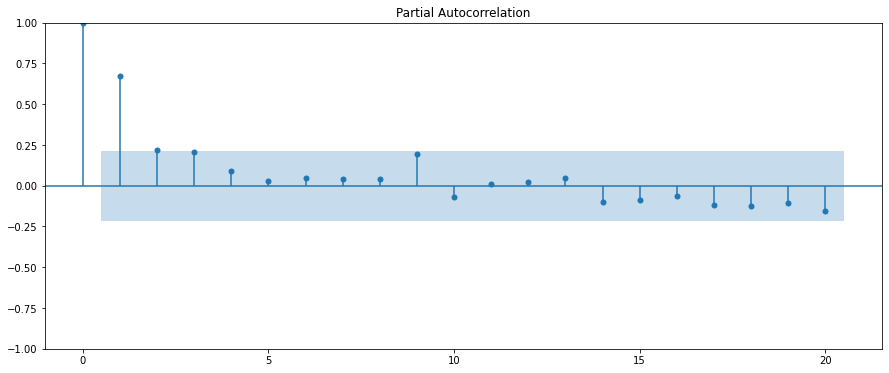

In [215]:
plot_acf(df, lags=20)
plot_pacf(df, lags=20)
pyplot.show()

In [216]:
# Primeira diff
# plot_acf(df.diff().dropna(), lags=20);
# plot_pacf(df.diff().dropna(), lags=20)
# Segunda diff
# plot_acf(df.diff().diff().dropna(), lags=20);
# plot_pacf(df.diff().diff().dropna(), lags=20);;

In [217]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df.target, order=(1,2,5))

In [218]:
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 target   No. Observations:                   84
Model:                 ARIMA(1, 2, 5)   Log Likelihood                -402.254
Date:                Sat, 03 Sep 2022   AIC                            818.507
Time:                        06:24:22   BIC                            835.354
Sample:                             0   HQIC                           825.271
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9013      0.213     -4.236      0.000      -1.318      -0.484
ma.L1         -0.6650      0.254     -2.622      0.009      -1.162      -0.168
ma.L2         -1.0014      0.374     -2.680      0.0

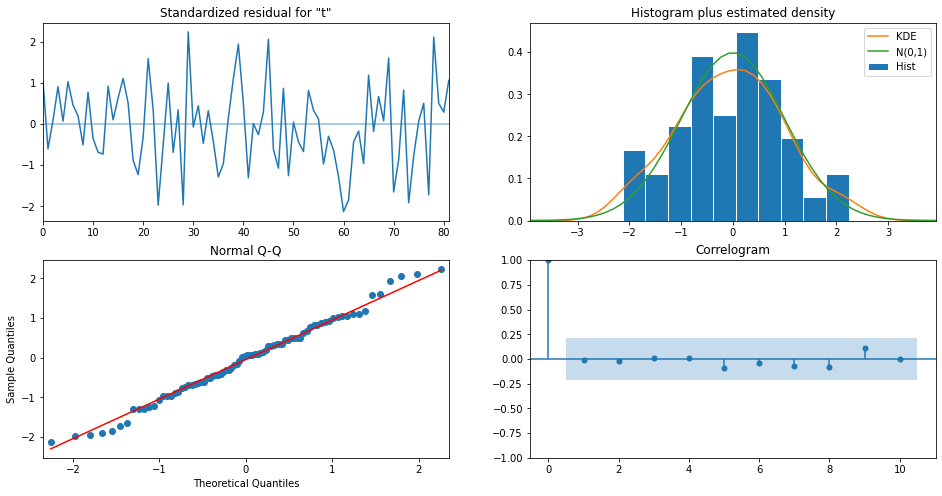

In [219]:
model_fit.plot_diagnostics(figsize=(16,8));

##### Qual o melhor conjunto de parâmetros?
* GridSearch é uma possibilidade;
* Algoritmo evolutivos são muito bem vindos;

In [220]:
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [223]:
import statsmodels.api as sm

bic_lista = []
best_order = []
min_ = 1e10
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(df.target, order=param)
    results = mod.fit()
    bic = round(results.bic,2)
    if bic < min_ :
        min_ = bic
        best_order = 'ARIMA{} - BIC: {}'.format(param, bic)
    bic_lista.append('ARIMA{} - BIC: {}'.format(param, bic))

In [224]:
bic_lista

['ARIMA(0, 0, 0) - BIC: 1137.67',
 'ARIMA(0, 0, 1) - BIC: 1048.97',
 'ARIMA(0, 1, 0) - BIC: 838.39',
 'ARIMA(0, 1, 1) - BIC: 820.08',
 'ARIMA(1, 0, 0) - BIC: 855.45',
 'ARIMA(1, 0, 1) - BIC: 837.59',
 'ARIMA(1, 1, 0) - BIC: 831.03',
 'ARIMA(1, 1, 1) - BIC: 822.88']

In [225]:
best_order

'ARIMA(0, 1, 1) - BIC: 820.08'

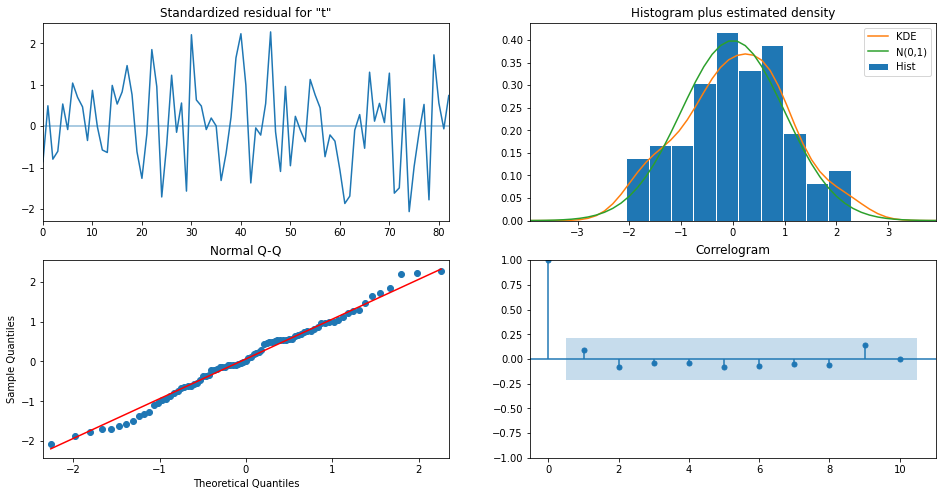

In [227]:
mod = sm.tsa.statespace.SARIMAX(df.target,
                               order=(0,1,1))
results = mod.fit()
results.plot_diagnostics(figsize=(16,8));

In [228]:
import pmdarima as pm

modelo_autoarima = pm.auto_arima(df, max_p=5 , max_q=5, max_d=2
                                 , seasonal=False, trace=True, information_criterion='bic'
                                 , stepwise=True)

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=842.776, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=835.374, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=824.070, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=838.391, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=826.751, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : BIC=826.684, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : BIC=831.103, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : BIC=820.083, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : BIC=822.876, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : BIC=822.801, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : BIC=831.034, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : BIC=827.219, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.432 seconds


In [229]:
modelo_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -405.623
Date:                Sat, 03 Sep 2022   AIC                            815.245
Time:                        06:25:13   BIC                            820.083
Sample:                             0   HQIC                           817.189
                                 - 84                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6698      0.082     -8.187      0.000      -0.830      -0.509
sigma2      1021.4795    177.977      5.739      0.000     672.651    1370.308
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                 0.59
Prob(Q):                              0.41   Prob(JB):                         0.75
Heteroskedasticity (H):               1.44   Skew:                            -0.02
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

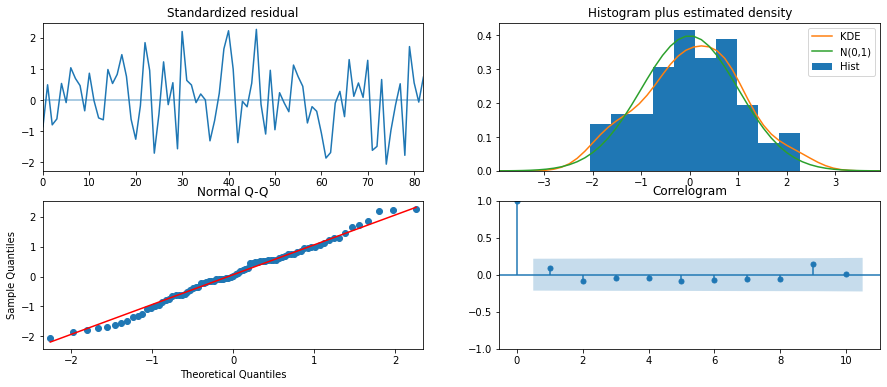

In [230]:
modelo_autoarima.plot_diagnostics();

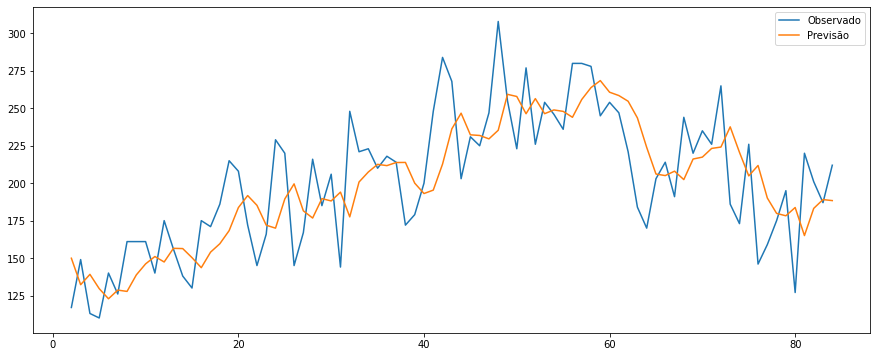

In [231]:
fitted = pd.Series(modelo_autoarima.predict_in_sample(), index=df.index)

fig, ax = plt.subplots()
ax.plot(df.iloc[1:], label='Observado')
ax.plot(fitted.iloc[1:], label='Previsão')
plt.legend()

In [232]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('SARIMA model Results')
print('r2', round(r2_score(df.iloc[1:], fitted.iloc[1:]),2))
print('mse', round(mean_squared_error(df.iloc[1:], fitted.iloc[1:]),2))
print('mae', round(mean_absolute_error(df.iloc[1:], fitted.iloc[1:]),2))

SARIMA model Results
r2 0.5
mse 1026.52
mae 25.83


##### Split dos dados

In [233]:
train = df.loc[0:50]
test = df.loc[51:84]

In [234]:
modelo_autoarima = pm.auto_arima(train, seasonal=True, trace=True
                                 , information_criterion='bic', stepwise=False)
modelo_autoarima

 ARIMA(0,1,0)(0,0,0)[1] intercept   : BIC=497.216, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : BIC=inf, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : BIC=inf, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : BIC=inf, Time=0.38 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : BIC=inf, Time=0.43 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : BIC=inf, Time=0.52 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : BIC=498.091, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : BIC=inf, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : BIC=inf, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : BIC=inf, Time=0.34 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : BIC=inf, Time=0.61 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : BIC=498.333, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : BIC=inf, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : BIC=inf, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : BIC=inf, Time=0.65 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : BIC=494.652, Time=0.18 sec
 ARIMA(3

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

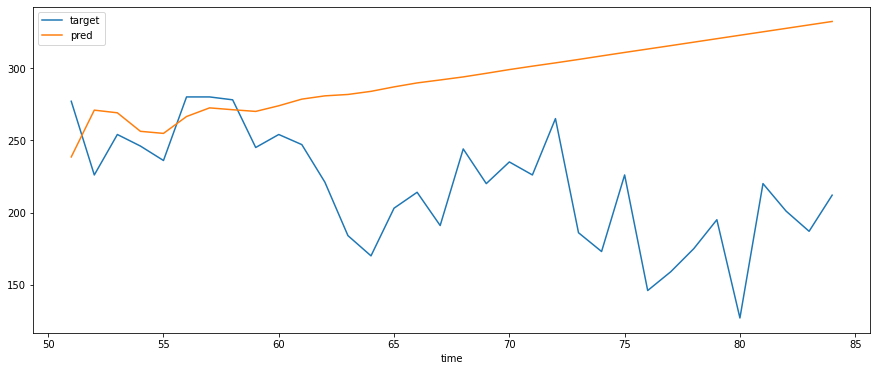

In [235]:
pred = modelo_autoarima.predict(n_periods=len(test))
pred_df = pd.DataFrame(pred, index=test.index, columns=['pred'])
pred_df = pd.concat([test, pred_df], axis=1)#.plot(linewidth=2)
pred_df.plot();
# pred_df

<AxesSubplot:xlabel='time'>

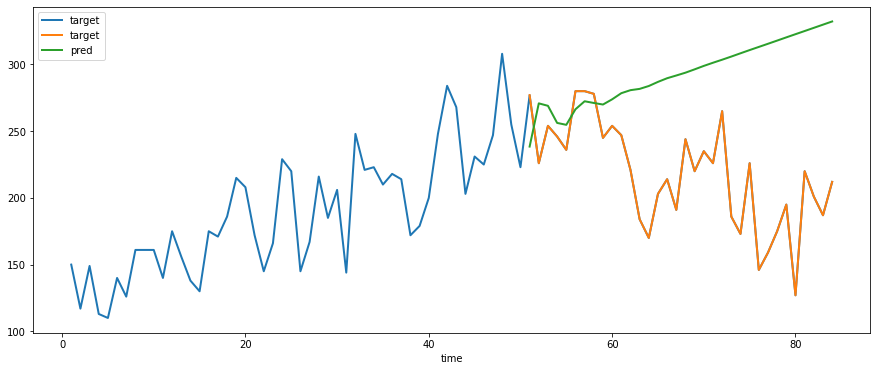

In [236]:
pd.concat([df, pred_df], axis=1).plot(linewidth=2)

In [238]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('SARIMA model Results')
print('mse', round(mean_squared_error(pred_df.target, pred_df.pred),2))
print('mae', round(mean_absolute_error(pred_df.target, pred_df.pred),2))

SARIMA model Results
mse 8932.29
mae 79.11
